In [7]:
import numpy as np
import pandas as pd

In [5]:
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as  plt
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit,cross_val_score,GridSearchCV,cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score,recall_score,f1_score,accuracy_score,roc_auc_score,roc_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [8]:
df = pd.read_csv('C:\Machine_Learning\Cardiovascular Diseases\heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [10]:
df.shape

(918, 12)

In [11]:
df.drop_duplicates()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [18]:
continuos_f = ["Age","RestingBP","Cholesterol","MaxHR","Oldpeak"]
categorical_f = ["ChestPainTType","RestingECG","ST_Slope"]
binaries_f = ["Sex","FastingBS","ExerciseAngina"]

In [14]:
df.isna().all()

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

In [19]:
df[continuos_f].describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364
std,9.432617,18.514154,109.384145,25.460334,1.066570
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


In [ ]:
# Data Wrangling

C:\Users\adars\AppData\Local\Temp\ipykernel_10588\2053250145.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


<Figure size 800x550 with 0 Axes>

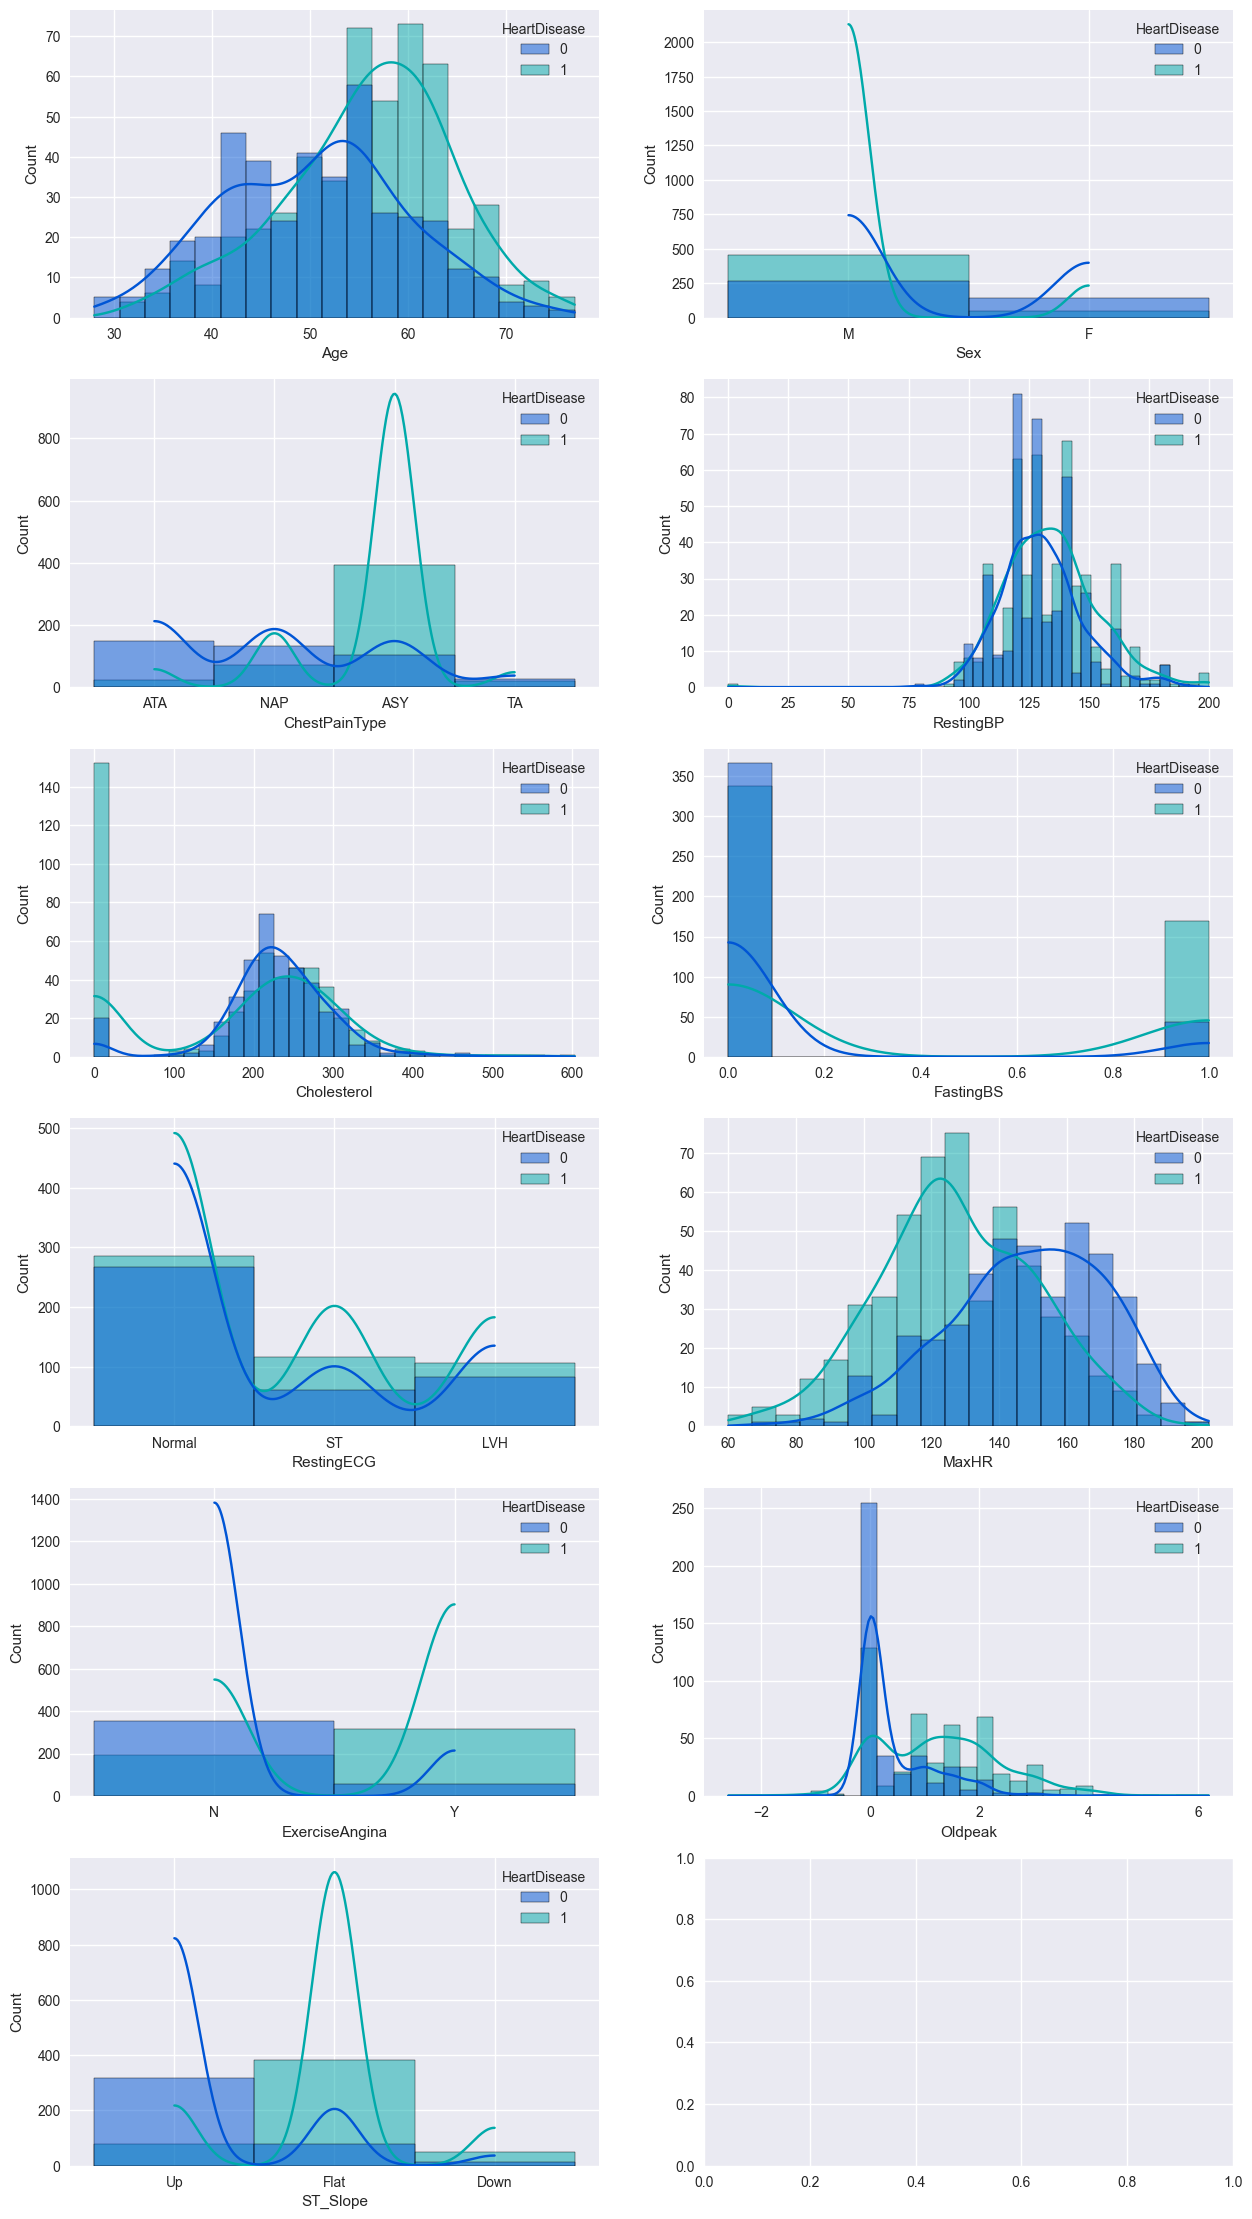

In [22]:
plt.style.use("seaborn")
plt.subplots_adjust(hspace=0.2)
color = 'winter'

fig, axs = plt.subplots(6,2,figsize=(15,28))
i =1
for feature in df.columns:
    if feature not in ["HeartDisease"] and i < 14:
        plt.subplot(6,2,i)
        sns.histplot(data=df, x=feature, kde=True,palette=color,hue='HeartDisease')
        i+=1

In [23]:
""""
Based on this visualization, we will an analysis:

Age: We see how the risk of suffering cardiovascular diseases (CVDs) increases with age.
Sex: Apparently the men have a major risk than women of suffering CVDs.
ChestPainType: The majority cases of CVDs present absence of chest pain or the usual anginal equivalents. Followed by the cases that present chest pain non-anginal.
RestingBP: According to the heart.org's article, the high blood pressure can drive to suffering CVDs. We see in this histogram a slight increase in the CVDs cases when increase the resting blood pressure. Let's observe that exists zero values of blood pressure, this it is incorrect we must treat them.
Cholesterol: It is well known that a high level of cholesterol can lead to stroke, heart attack, or even heart failure. However, according to the Heatline's article not all serum cholesterol is bad, exist three cholesterol types that compose a serum cholesterol, HDL or 'good' cholesterol, LDL or 'bad' cholesterol and triglycerides(TG), where high HDL levels are better than high LDL and TG levels. The level of serum cholesterol (SC) can be calculated like the sum between levels of HDL, LDL and TG, SC[mm/dl] = HDL[mm/dl] + LDL[mm/dl] + TG[mm/dl], note that we don't know the concentrations of HDL, LDL and TG in serum cholesterol of our dataset, but Heatline get us a reference level to determinate when a pacient have risk of suffering CDVs. A serum cholesterol major than 200 mm/dl is considered a risk factor for health, let'us in our histogram that majority cases of CVDs have major levels that 200 mm/dl. In other hand, let's observe that exists zero values and value too high (atypical cases) of serum cholesterol, this it is incorrect we must treat them.
FastingBS: According to CDC's article, high blood sugar can damage blood vessels and the nerves that control your heart. For this reason is that patients with diabetes have most risk of suffering CVDs. Our dataset reflect this condition, where the majority of patients with high blood sugar have CVDs.
RestingECG: The majority cases of patients with CVDs present normal resting electrocardiograms, but we observe that in the cases that present ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) the amount of patients with CVDs are two times more than patientes that not suffering CVDs, something similar occurs with cases that present probable or definite left ventricular hypertrophy but to a lesser degree.
MaxHR: we don't know the conditions in which they were measured this values, so we can't talk about if this values can be to correct. The truth is that patients with CVDs present low values of maximum heart rate, while that patients with normal conditions present values more high.
ExerciseAngina: Angina is chest pain or discomfort caused when your heart muscle doesn't get enough oxygen-rich blood. But angina is not a disease. It's a symptom of an underlying heart problem, and for this reason that the majority of patients with CVDs present exercise-induced angina.
Oldpeak: Also called ST segment depression is a factor that relationed with several CVD, but in some cases this depression can be normal. We can observe that patients with CVDs present high values of depression, though also some patients with CVDs present zero values of depression.
ST_slope: According to Ecgwaves's article, upsloping ST segment can be generally considered like normal, but so much flat or horizontal ST segment and dowsloping ST segment can be considered like anomalies, and they are present in the majority cases of patients with CVDs as reflected by our histogram.

"""

'"\nBased on this visualization, we will an analysis:\n\nAge: We see how the risk of suffering cardiovascular diseases (CVDs) increases with age.\nSex: Apparently the men have a major risk than women of suffering CVDs.\nChestPainType: The majority cases of CVDs present absence of chest pain or the usual anginal equivalents. Followed by the cases that present chest pain non-anginal.\nRestingBP: According to the heart.org\'s article, the high blood pressure can drive to suffering CVDs. We see in this histogram a slight increase in the CVDs cases when increase the resting blood pressure. Let\'s observe that exists zero values of blood pressure, this it is incorrect we must treat them.\nCholesterol: It is well known that a high level of cholesterol can lead to stroke, heart attack, or even heart failure. However, according to the Heatline\'s article not all serum cholesterol is bad, exist three cholesterol types that compose a serum cholesterol, HDL or \'good\' cholesterol, LDL or \'bad\' 

In [ ]:
# Outlier Detection

In [35]:
def detect_outliers(label=None):
    Q1 = df[label].quantile(0.25)
    Q3 = df[label].quantile(0.75)
    IQR = Q3 - Q1
    interval = ((df[label] > Q1 - 1.5*IQR) & (df[label] < Q3 + 1.5*IQR))
    return df[interval], df[~interval]

def assign_mean(df_out, not_df_out, label=None):
    df.loc[df_out[df_out["HeartDisease"] == 0].index, label] = not_df_out[not_df_out["HeartDisease"] == 0][label].mean()
    df.loc[df_out[df_out["HeartDisease"] == 1].index, label] = not_df_out[not_df_out["HeartDisease"] == 1][label].mean()
    return

def delete_outliers(df_out):
    return df.drop(df_out.index)

<Axes: xlabel='Cholesterol'>

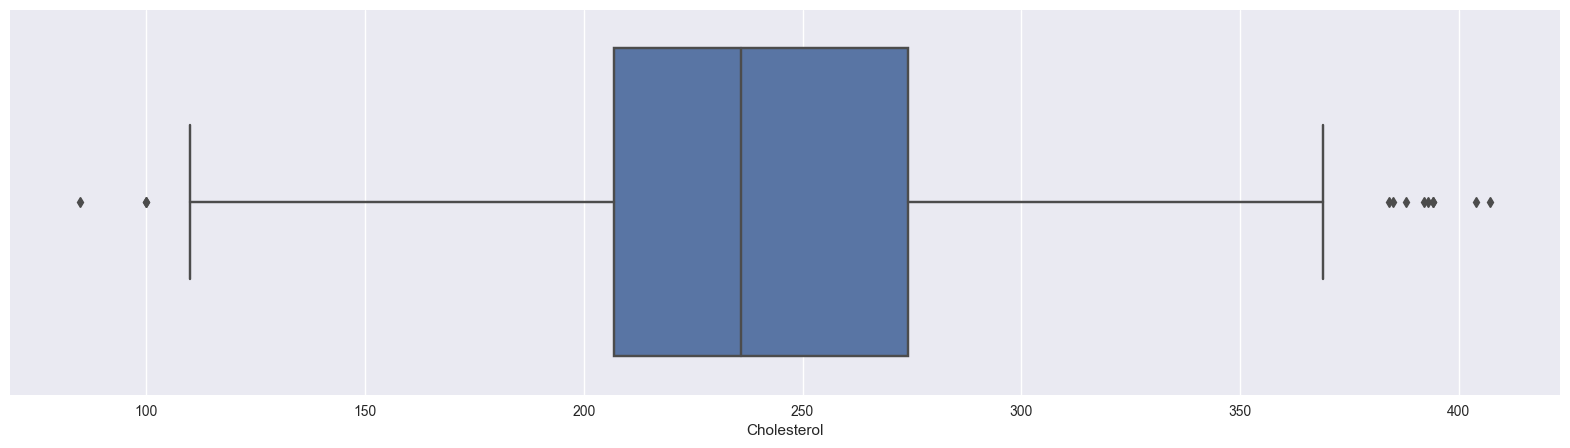

In [36]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df,x="Cholesterol")

In [37]:
not_df_out_ch, df_out_ch = detect_outliers('Cholesterol')
print(f'Outliers in Cholesterol represent the {round((df_out_ch.shape[0]*100)/df.shape[0],2)}% of our dataset')
df_out_ch

Outliers in Cholesterol represent the 1.63% of our dataset


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
78,52,M,ATA,140,100,0,Normal,138,Y,0.0,Up,0
98,56,M,ASY,120,85,0,Normal,140,N,0.0,Up,0
102,40,F,ASY,150,392,0,Normal,130,N,2.0,Flat,1
123,58,F,ATA,180,393,0,Normal,110,Y,1.0,Flat,1
132,56,M,ASY,170,388,0,ST,122,Y,2.0,Flat,1
182,52,M,ASY,140,404,0,Normal,124,Y,2.0,Flat,1
256,55,F,ATA,130,394,0,LVH,150,N,0.0,Up,0
444,56,M,ASY,120,100,0,Normal,120,Y,1.5,Flat,1
498,67,M,ASY,160,384,1,ST,130,Y,0.0,Flat,1
613,58,M,ASY,140,385,1,LVH,135,N,0.3,Up,0


<Axes: xlabel='Cholesterol', ylabel='Count'>

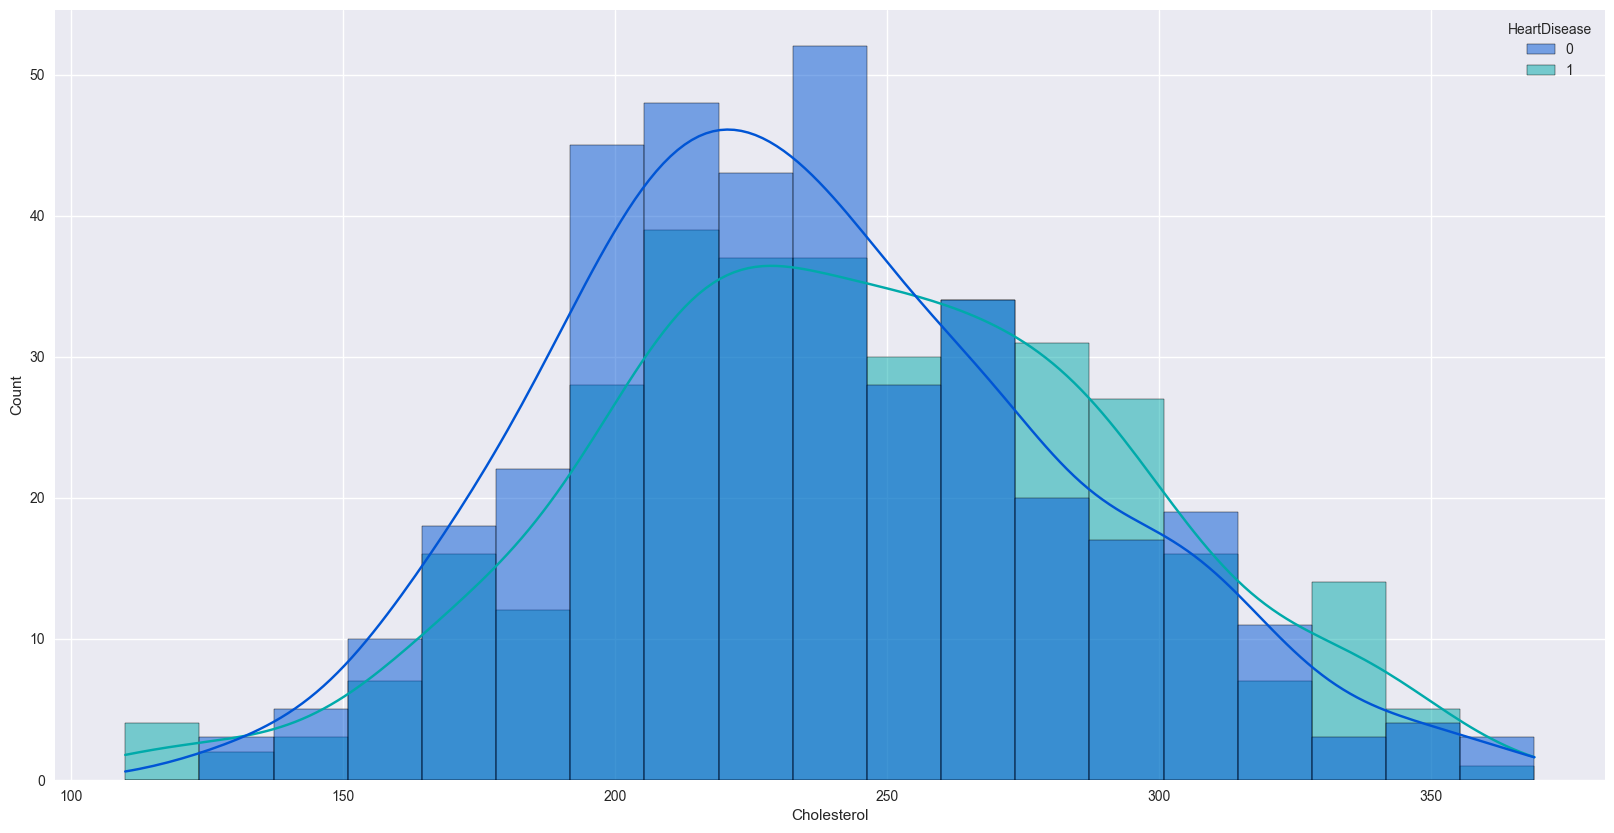

In [38]:
df = delete_outliers(df_out_ch[df_out_ch["Cholesterol"] == 0])
assign_mean(df_out_ch[df_out_ch["Cholesterol"] != 0], not_df_out_ch, 'Cholesterol')

plt.figure(figsize=(20,10))
sns.histplot(data=df, x='Cholesterol', kde=True, palette=color, hue='HeartDisease')

<Axes: xlabel='RestingBP'>

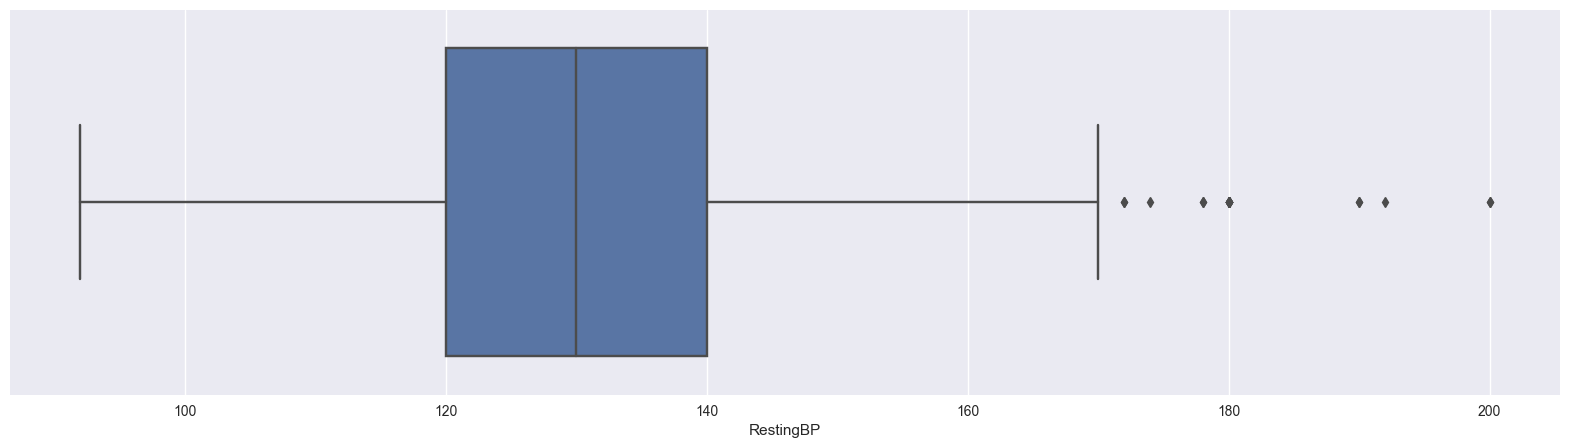

In [39]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df,x='RestingBP')

In [47]:
not_df_out_rbp, df_out_rbp = detect_outliers('RestingBP')
print(f'Outliers in resting blood pressure represent the {round((df_out_rbp.shape[0]*100)/df.shape[0], 2)}% of our dataset')
df_out_rbp

Outliers in resting blood pressure represent the 0.0% of our dataset


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


<Axes: xlabel='RestingBP', ylabel='Count'>

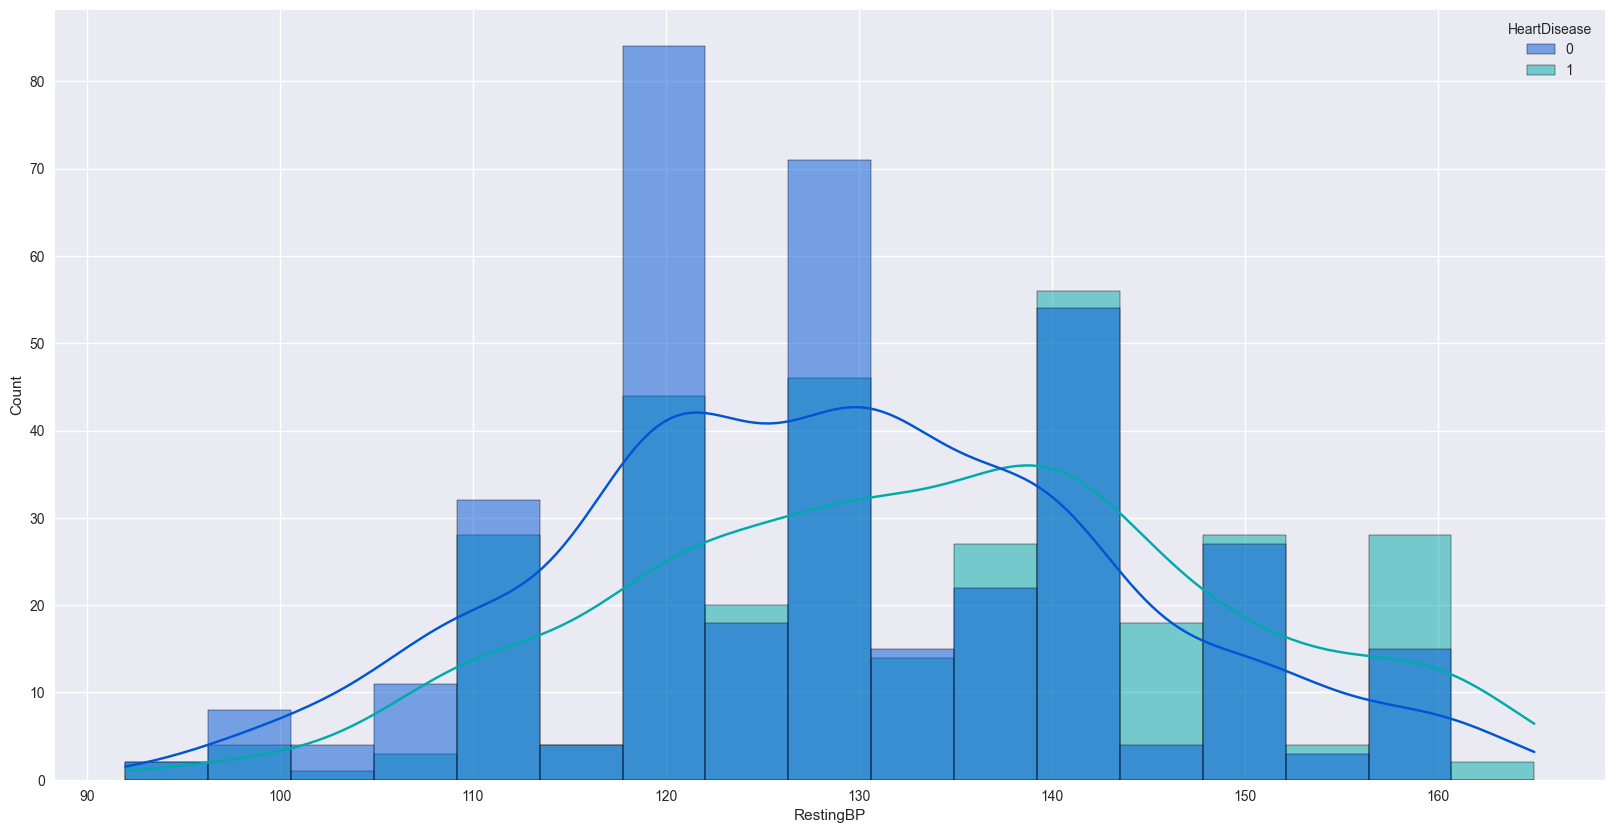

In [48]:
df = delete_outliers(df_out_rbp)
plt.figure(figsize=(20,10))
sns.histplot(data=df, x='RestingBP', kde=True, palette=color, hue='HeartDisease')